자 지금까지 선형회귀, 로지스틱 회귀, 단일층 신경망에 대해 배웠다. <br>
이것들은 딥러닝을 위한 핵심 알고리즘이다. <br>
따라서 지금부터는 훈련 노하우에 대해 알아볼 것이다.<br>

# 훈련 노하우 :
모델을 안정적으로 훈련하기 위해 필요한 기법들 <br>

# 검증 세트를 나누기, 전처리

이전에 훈련 세트와 테스트 세트로 나누어서 테스트 세트를 score() 메서드에 전달하여 모델의 성능을 알아 보았다. <br>
지금 부터 이 테스트 세트의 사용 방법에 대해 조금 더 알아보려고 한다. <br>
어떤점에 대해 더 알아본다는 거지?? 말 그대로 테스트 세트는 모델의 성능에 대해 알면 된거 아닌가? <br>
<br>
-> 만약 테스트 세트로 모델의 성능을 측정 후 모델의 성능이 낮다면 테스트 세트에 잘 맞게끔 모델을 고쳐나갈 것이다.<br>
하지만 테스트 세트의 데이터에만 너무 잘 맞는 모델이 만들어진다면 실제 데이터들에게 좋은 성능을 내지 못할 수 있다. (실제로 못한다.) <br>
<br>
-> 따라서 지금부터 하고자 하는 목표는 특정 데이터 세트에만 치우친 (대표적으로 테스트 세트에 치우치는) 모델을 만들지 않는 것이다. <br><br>

## 테스트 세트로 모델을 튜닝
이전에 사이킷런의 SGDClassifier 클래스를 이용하여서 로지스틱 회귀 문제에 경사 하강법을 적용하였다. <br>
이때 매개변수인 loss의 값을 log로 지정하여 로지스틱 손실함수를 손실함수로 지정하였다. <br>

### 로지스틱 회귀로 모델 훈련하고 평가


In [67]:
from sklearn.datasets import load_breast_cancer # 사이킷런에서 제공하는 유방암 데이터 가져오기
from sklearn.model_selection import train_test_split 

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42) # 훈련세트와 테스트 세트로 나눈다.


In [68]:
from sklearn.linear_model import SGDClassifier 

sgd = SGDClassifier(loss = 'log', random_state = 42) # 이전에 설명하였듯이 로지스틱 손실함수를 손실함수로 지정하기 위해 매개변수인 loss의 값을 log로 지정한다.
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

# 테스트 세트에서 정확도가 83%정도 나왓다. 
# 뭔가 결과가 아쉽기 때문에 다른 손실 함수를 사용하려고 한다. -> 매개변수 loss에 log가 아닌 다른 것으로 지정해줘야 한다는 의미!
# 하지만 loss와 같은 매개변수들의 값은 가중치나 절편처럼 알아서 학습되지 않기 때문에 직접 선택을 해야한다!!!
# -> 이러한 값을 하이퍼파라미터(hyperparameter) 라고 부른다.

0.8333333333333334

매개변수 loss 값을 다른 값으로 바꾸어 손실 함수를 바꾸어보자 <br>
어떤 손실 함수로 바꿀까??? <br>
<br>

SGDClassifier 클래스의 loss 매개변수를 log에서 hinge로 바꾸면 선형 서포트 벡터 머신(Support Vector Machine, SVM) 문제를 푸는 모델이 만들어 진다. <br>
갑자기 SVM ????? -> 훈련 데이터의 클래스를 구분하는 경계선을 찾는 작업 정도로만 알고 나중에 더 자세히 알아보자 <br>


In [69]:
# 매개변수 loss 값을 log -> hinge로 바꾸어 손실함수를 로지스틱 손실함수에서 선형 서포트 벡터 머신 문제를 푸는 모델 (그때에 쓰는 손실함수가 있겠지 정도로 알자)로 바꾸자

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss = 'hinge', random_state = 42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

# 테스트 세트에서 정확도가 94% 정도로 이전 로지스틱 손실함수를 사용한 경우보다 훨씬 높아졌다.

0.9385964912280702

자 위처럼 만약 모델의 성능 결과가 만족스럽지 않다면 loss 매개변수의 값을 바꾸었듯이 <br>
SGDClassifier 클래스의 다른 매개변수들을 바꾸어 보면 된다 <br>
이러한 과정을 -> <b> 모델을 튜닝한다 </b> 라고 부른다. <br>
즉 모델을 튜닝하면 성능을 높일수도 있다. <br><br>

방금 성능을 높인다가 아니라 높일수도 있다고 하였다.<br>
실제로 모델을 튜닝하는 방법으로는 실전에서 좋은 성능을 내기 어려운 경우가 많다. <br>
(모델을 튜닝하여 테스트 세트에 대한 성능은 높여도 실전에서 좋은 성능을 내기 어렵다는 의미이다 !!!) <br>
-> 왜 ??? <br> <br>


### 테스트 세트로 모델을 튜닝하면 실제에서 좋은 성능 기대하기 어려움
테스트 세트의 목적은 실전에 투입된 모델의 성능을 측정하는 것이다.!!!! <br>
하지만 테스트 세트로 모델을 튜닝하면 <b> 테슽트 세트에 대해서만 좋은 성능을 보여주는 모델이 된다!!! </b> <br><br>
이전에 모든 데이터로 훈련을 하면 어떤 데이터로 모델이 잘 훈련 되었는지 알 수 없기에 훈련 세트와 테스트 세트로 나눈다는 설명에서 든 예시와 비슷한 예를 들어 보면 <br>
특정 시험문제에 대한 답안을 외우게하면 그 시험에 익숙해진 사람은 같은 시험지를 주면 잘 풀것이다. <br>
하지만 특정 시험문제가 아닌 다른 문제를 낸다면 과연 그 사람은 문제를 잘 풀까? <br>
-> 잘 풀지 못할 가능성이 크다. 왜냐하면 특정 시험 문제에 대해서만 잘 알기 때문이다 <br>
<br>
테스트 세트로 튜닝을 한 모델도 위의 예시와 똑같다. <br>
테스트 세트에 대해서만 좋은 성능을 내도록 모델을 계속해서 튜닝하면 테스트 세트에 대해서만 잘 알게되고 실전에서는 같은 성능을 기대하기 어렵다. (오히려 튜닝을 할수록 떨어지는 경우도 생긴다.) <br>
이러한 현상을 <b> 테스트 세트의 정보가 모델에 새어 나갔다 </b> 라는 표현을 한다. <br>
<br>

<b> 테스트 세트로 모델을 튜닝하면 테스트 세트의 정보가 모델에 새어 나가게 되어 모델의 일반화 성능(generalization performance)가 왜곡된다. </b> <br><br>

<b>따라서 테스트 세트는 모델 튜닝을 모두 마친 후 실전에 투입하기 전에 딱 한번 성능 평가를 하기위해 사용 해야한다.</b> <br><br>

그러면 어떻게 해결 하지 ??? <br>
-> 모델을 튜닝할때 테스트 세트를 사용하지 않으면 되지.. <br>
<br>
아니 그러면 모델을 튜닝하려면 현재 모델의 성능을 알아야 하는데 이전처럼 어떻게 성능 점수를 평가할건데?? <br>
모델 튜닝을 위한 세트를 따로 준비하면 되지!! <br> <br>

### 검증 세트(Validation Set)를 준비한다.
모델을 튜닝하는 요도의 세트를 검증 세트라고 하며 훈련 세트에서 조금 떼어서 만들면 된다. <br>
예를들어 이전에 전체 데이터에서 훈련 세트를 80% 테스트 세트를 20%로 나누었다면 <br>
훈련세트에서 일부를 떼어 훈련 세트를 60% 검증 세트를 20% 훈련 세트를 20%로 나누면 된다.
<br><br>

이제 전체 데이터 세트를 훈련 세트, 검증 세트, 테스트 세트로 나누어 SGDClassifier 클래스로 만든 모델을 훈련해볼 것이다.

In [70]:
# 데이터 세트를 준비한다

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

In [71]:
# 검증 세트를 분할하기

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify = y_train_all, test_size = 0.2, random_state = 42)

# 훈련, 검증, 테스트 세트를 각각 6 : 2 : 2로 나누기로 하였었다. 하지만 실제 분할 적용은 처음부터 6 : 2 : 2로 나누는 것이 아니라
# 전체 데이터 세트를 훈련 세트와 테스트 세트로 8 : 2로 나누고 훈련 세트를 다시 훈련세트와 검증세트로 8 : 2로 나눈다

# 그럼 엄밀히 6 : 2 : 2가 아니겠지 -> 8에서 8 : 2로 나누면 전체 10(훈련, 검증, 테스트 세트 전부)으로 볼때 6.4 : 1.6으로 나눠지기 때문에
# 사실 정확히 훈련, 검증, 테스트 세트가 각각 6.4 : 1.6 : 2로 나뉘어 진다.

print(len(x_train), len(x_val), len(x_test))

# 여기서 볼 수 있듯 훈련, 검증, 테스트 세트가 각각 6.4 : 1.6 : 2 비로 나눠지는 것을 알 수 있다.

364 91 114


In [72]:
# 검증 세트로 모델을 평가해보자
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss = 'log', random_state = 42)
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)

# ??? 이전의 성능보다 훨씬 낮아졌다 왜그럴까?
# -> 당연하다 이전에 비해 훈련세트를 일부를 검증세트로 나누게 되면서 훈련세트의 크기가 줄어기 때문이다

0.6923076923076923

우리가 사용한 위스콘신 유방암 데이터 세트의 샘플 개수는 적은편이기 때문에 검증 세트의 비율이나 random_state 매개변수의 값을 조금만 조절하더라도 성능 차이가 크게 변한다. <br>
<br>

데이터 양이 너무 적으면 검증세트를 나누게 되면 훈련 세트의 크기가 너무 작아지기 때문에 이 경우에는 검증 세트를 나누지 않고 <b>교차 검증(cross validation)</b> 이라는 방식을 사용한다. <br>
교차 검증에 대해서는 차후에 알아보자<br><br>

하지만 최근에는 대량의 훈련 데이터를 모으기가 수월해졌기 때문에 검증 세트로 나누는 경우가 많다. <br>
<br>
일반적으로 훈련, 검증, 테스트 세트의 비율을 <br>
데이터가 10만개 정도 일때 -> 8 : 1 : 1 <br>
<br>
딥러닝 경우에는 더 많은 데이터를 사용하는 경우가 많은데 <br>
데이터가 100만개 이상일 경우 -> 98 : 1 : 1 <br>
<br>
일반적으로 검증, 테스트 세트의 샘플 수가 1만개 이상 확보가 된다면 나머지 샘플은 훈련 세트에 할당하는 것이 좋다고 한다. <br><br>

다시 위의 예제로 돌아가면 뭐 성능은 많이 낮아졌지만 일단 검증 세트가 잘 준비 된것으로 볼 수 있다. <br>


## 데이터 전처리와 특성의 스케일

지금까지 예제를 보면 알 수 있듯이 사이킷런과 같은 머신러닝 패키지에 준비되어 있는 데이터는 대부분 실습을 우한 것이기 때문에 이미 데이터 자체가 잘 가공되어 있다.(바로 훈련, 검증, 테스트 세트로 사용될 수 있을 정도로 잘 가공 되어 있다는 의미) <br><br>

하지만 실전에서 머신러닝, 딥러닝 분야에서는 데이터를 전처리(가공)하는 과정이 시간이 매우 오래 걸린다고 한다. <br>
실전에서 수집된 데이터는 누락된 값이 있을수도, 데이터의 형태가 균일하지 않을수도 있다. <br>
이러한 데이터를 사용하면 제대로 된 결과를 얻을 수 없다.<br>
-> 데이터를 적절히 가공하는 <b>데이터 전처리(data preprocessing)</b> 과정 필요

### 특성의 스케일은 알고리즘에 영향을 준다.

잘 정리된 데이터도 전처리를 해야하는 경우가 존재한다 <br>
엥 굳이 왜 ?? 어떤 경우에?<br>
-> <b>특성의 스케일(scale)</b>이 다른 경우이다. <br>
<br>
특성의 스케일이 뭔데?? <br>
어떤 특성이 가지고 있는 값의 범위를 말한다.<br>
<br>

그래 데이터의 값의 범위가 다른 경우에 왜 전처리를 해야하지? <br>
예를 들어보자 사과 1, 2, 3 데이터가 존재한다 해보자. <br>
각각 순서대로 당도가 4, 8, 2 <br>
무게가 540, 700, 480 이라고 하자 <br>
위 데이터는 형태도 균일하고 누락된 값도 없다.<br>
하지만 사과의 당도 범위가 1 ~ 10 <br>
사과의 무게 범위가 500 ~ 1000이다.<br>
-> 이 경우 <b>두 특성의 스케일 차이가 크다</b> 라고 한다. <br>
<br>

특정 알고리즘은 스케일에 매우 민감하다. 따라서 모델의 성능에 영항을 미칠 수 있다<br>
이전에 설명한 신경망 알고리즘 그리고 앞으로 사용할 신경망 알고리즘들 모두 경사하강법을 사용할 것이다.<br>
그런데 경사하강법은 스케일에 아주 민감한 알고리즘이다. <br>
따라서 특성의 스케일을 맞추는 등의 전처리가 필요하다. <br>
특성이 스케일을 맞추는 전처리를 하는 것을 -> <b>스케일을 조정한다</b>라고 표현을 한다. <br>
<br>
그럼 예제를 통해 특성의 스케일을 조정하면 어떤 점이 좋아질지 알아보자 <br>

['mean perimeter' 'mean area']


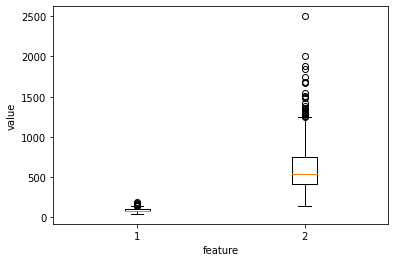

In [73]:
# 먼저 스케일을 조절하지 않고 모델을 훈련해보자

import matplotlib.pyplot as plt

print(cancer.feature_names[[2, 3]])
# 유방암 데이터의 mean perimeter와 mean area 특성의 스케일을 알아보자

plt.boxplot(x_train[:, 2:4])
plt.xlabel("feature")
plt.ylabel("value")
plt.show()
# boxplot을 그려 두 특성이 스케일을 확인해보자
# 그래프를 보면 두 특성의 스케일 차이가 큰 것을 알 수있다.
# mean perimeter는 value가 100 ~ 200 위치
# mean area는 value가 200 ~ 2000 사이에 위치한다.

# -> 스케일이 다른 두 특성에 경사하강법을 적용해보자

In [74]:
# 가중치를 기록할 변수와 학습률 파라미터 추가해보자

import numpy as np

class SingleLayer:
  
  # init() 메서드에서 인스턴스 변수 w_history를 만들고 학습률 파라미터 learning_rate를 추가한다

  # learning_rate는 하이퍼파라미터 이고 변수 이름 그대로 '학습률' 이라고 한다.
  # 이 값으로 가중치의 업데이트 양을 조절할 것임
  
  def __init__(self, learning_rate = 0.1): # 학습률 파라미터 learning_rate 추가
    self.w = None
    self.b = None
    self.losses = []
    self.w_history = [] # SingleLayer 클래스에 인스턴스 변수를 추가하여서 epoch마다 가중치의 값을 저장하면서 가중치의 변화를 확인 해보자
    self.lr = learning_rate

    self.losses = [] 

  def forpass(self, x): 
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err): 
    w_grad = x * err
    b_grad = 1 * err 

    return w_grad, b_grad
  
  def activation(self, z):
    z = np.clip(z, -100, None) 
    a = 1 / (1 + np.exp(-z))

    return a

  # 가중치 기록하고 업데이트 양을 조절하자

  #fit 메서드에서 가중치가 바뀔 때 w_history 리스트에 가중치를 기록하자
  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1]) 
    self.b = 0
    
    self.w_history.append(self.w.copy()) # 가중치를 기록한다.
    # 넘파이 배열을 리스트에 추가하면 실제 값이 복사되는 것이 아니라 배열을 참조함
    # 따라서 가중치 변수에 self.w 값이 바뀔때마다 그 값을 복사하여 w_history 리스트에 추가해야한다.
     

    np.random.seed(42)

    for i in range (epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) 

      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)

        err = -(y[i] - a)

        w_grad, b_grad = self.backprop(x[i], err) 

        self.w -= self.lr * w_grad # 학습률을 적용하여 가중치를 갱신해보자
        # -> w_grad에 학습률 self.lr을 곱하여 가중치 업데이트 양 조절함.

        self.b -= b_grad 

        self.w_history.append(self.w.copy()) # 가중치 기록

        a = np.clip(a, 1e-10, 1 - 1e-10) 

        loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a)) 
      
      self.losses.append(loss/len(y)) 

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0
  
  def score(self, x, y):
    return np.mean(self.predict(x) == y)



## 학습률이라는 개념을 알아보자
init() 메서드에서 인스턴스 변수 w_history를 만들고 학습률 파라미터 learning_rate를 추가한다 <br><br>

learning_rate는 하이퍼파라미터 이고 변수 이름 그대로 <b>학습률</b> 이라고 한다. <br>
이 값으로 가중치의 업데이트 양을 조절할 것임 <br>
일반적으로 손실함수는 복잡한 굴곡을 가진 다차원 공간의 초평면(hyperplane)이다. <br>
만약 가중치를 큰 폭으로 업데이트 하여 손실 함수가 최소가 될 수 있는 지점인 전역 최솟값을 지나쳐 버리게 되면 <br>
최적의 해(최적의 가중치와 절편)을 구할 수 없게 된다. <br>
따라서 전역 최솟값을 놓치지 않도록 가중치의 업데이트 양을 조절할 필요가 있다.<br>
학습률에 따라 손실 함수의 값이 어떻게 변하는지 아래 그림을 통해 알아보자 <br>
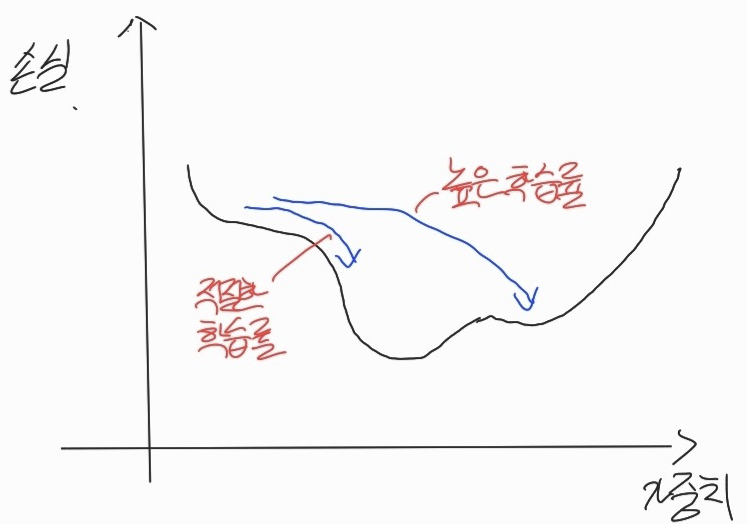 <br>

### 적절한 학습률 :
학습률이 적절해야 가중치의 변화가 안정적이므로 전역 최솟값에 잘 도달함<br>
### 높은 학습률 :
학습률이 너무 높으면 가중치의 변화가 크므로 전역 최솟값을 지나칠 수 있음 <br>
<br>

<b> 손실 함수의 표면을 천천히 이동하며 전역 최솟값을 찾는다</b> 라는 표현을 한다. <br>
각 상황마다 적절한 학습률은 다르지만 보통 0.001, 0.01 등의 로그 스케일로 학습률을 지정하여 테스트한다. <br>
<br>




In [75]:
# 모델을 훈련하고 평가 해보자

layer1 = SingleLayer()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

# 스케일을 조정하지 않은 훈련세트를 이용하여 모델을 훈련
# 이때의 성능을 확인해보니 약 91% 정도임을 확인할 수 있다

0.9120879120879121

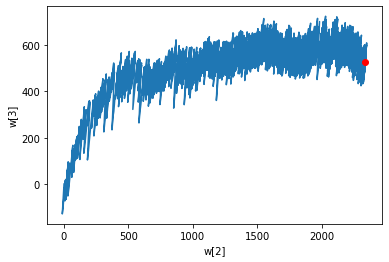

In [76]:
# layer1 객체의 인스턴스 변수 w_history에는 100번의 epoch 동안 변경된 가중치가 모두 기록되어 있음
# 이때 3, 4번째 요소는(w[2], w[3]) 각각 mean perimeter 와 mean area 특성에 대한 가중치이다.
# 이 요소로 그래프를 그려보면 아래와 같다

w2 = []
w3 = []

for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro') # 최종으로 결정된 가중치는 점으로 표시

plt.xlabel('w[2]')
plt.ylabel('w[3]')

plt.show()



위 그래프를 보자 mean perimeter에 비해 mean area 스케일이 크므로 w3 값이 학습 과정에서 큰 폭으로 변화하고 있음을 확인할 수 있다. <br><br>

w2 경우 0부터 시작하여 조금씩 최적값에 가까워 진다.<br><br>

이 그래프의 현상을 w3에 대한 gradient가 크기 때문에 <br>
<b>w3축을 따라 가중치가 크게 요동치고 있다</b> 라고 말한다 <br>
즉 가중치의 최적값에 도달하는 동안 w3 값이 크게 요동치므로 모델이 불안정하게 수렴한다는 것을 알 수 있다. <br> <br>

위 현상을 어떻게 하면 줄일 수 있을까?<br>
이 부분에 대해 설명하기 위해 지금까지 설명을 해왓다.<br><br>

-> 스케일을 조정하면 된다.

## 스케일을 조정해 모델을 훈련해보자

스케일을 조정하는 방법은 많다. <br>
그 중 신경망에서 자주 사용하는 방법 중 하나로 표준화를 사용할 것이다. <br><br>

### 표준화(standardization) :
특성값에서 평균을 빼고 표준 편차로 나눈 값으로 표준화를 하면 평균이 0, 분산이 1인 특성이 만들어 진다.<br>
### $z = \frac{x - \mu}{s}$
$\mu$ : 평균, s : 표준편차 <br><br>

사이킷런에서는 이러한 표준화를 위한 StandardScaler 클래스가 준비되어 있다. <br>
하지만 학습을 위해 직접 표준화를 구현해 보자 <br>


In [77]:
# 넘파이로 표준화를 구현해보자

# 넘파이의 mean() 함수로 평균을, std() 함수로 표준편차를 구할 수 있다.

train_mean = np.mean(x_train, axis = 0)
train_std = np.std(x_train, axis = 0)
x_train_scaled = (x_train - train_mean) / train_std

# 평균과 표준편차를 구할 때
# axis 매개변수를 0으로 지정하면 2차원 배열의 열을 기준으로 통계치를 계산하여 하나의 행 벡터로 변환을 해준다.
# 이후 훈련 세트 x_train에서 평균을 빼고 표준 편차로 나누면된다

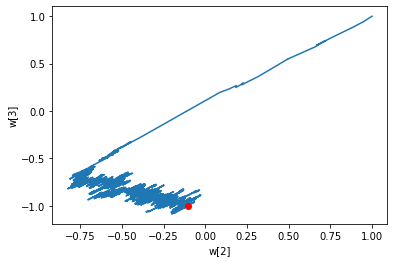

In [78]:
# 모델 훈련을 해보자

# 이제 스케일을 조정한 데이터 세트로 단일층 신경망을 다시 훈련시키고 가중치를 그래프로 그려보자

layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)
w2 = []
w3 = []

for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')

plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

# 그래프를 보면 이전에 스케일 조정을 하기전 그래프와 매우 큰 차이가 있음을 확인할 수 있다.
# w2와 w3의 변화 비율이 비슷하기 때문에 대각선 방향으로 가중치가 이동되었음을 확인할 수 있다.

# 두 특성 스케일을 비슷하게 맞추었으므로 최적값에 빠르게 근접하고 있음을 알 수 있다.

# 이렇듯 경사 하강법에서는 서로 다른 특성의 스케일을 맞추는 것이 매우 중요함을 알 수 있다.

In [79]:
# 모델 성능을 평가해보자

layer2.score(x_val, y_val)

# ????? 아니 스케일 조정하기전에는 성능이 (정확도가) 91% 정도 엿는데 머지?? 스케일 조정 후 성능을 보면 정확도 37% 정도로 아주 많이 떨어졌다 <br>
# 무슨일이지 ??

# 모델은 훈련 세트와 검증 세트의 스케일이 비슷할 것으로 기대한다
# 하지만 검증 세트의 스케일을 바꾸지 않았기 때문에 성능이 매우 떨어진 것

0.37362637362637363

In [80]:
# 다시 검증 세트도 표준화 전처리를 적용해보자

val_mean = np.mean(x_val, axis = 0)
val_std = np.std(x_val, axis = 0)
x_val_scaled = (x_val - val_mean) / val_std

layer2.score(x_val_scaled, y_val)

# 검증 세트에 대한 정확도가 약 96% 정도로 스케일 조정 전 성능에 비해서도 좋아진 것을 알 수 있다.

0.967032967032967

자 지금까지 보면 스케일 조정을 잘 하여 모델의 성능을 높였기에 괜찮게 데이터를 전처리 했다고 생각할 수 있다. <br>
하지만 정말 조심해야할 교묘한 ?? 함정이 숨어 있는데 그 함정에 대해 알아보자

## 스케일을 조정한 다음에 실수하기 쉬운 함정에 대해 알아보자

이전에 언급했지만 함정 중에 하나는 <b>훈련 세트와 검증 세트가 다른 비율로 스케일이 조정된 경우</b>이다. <br><br>



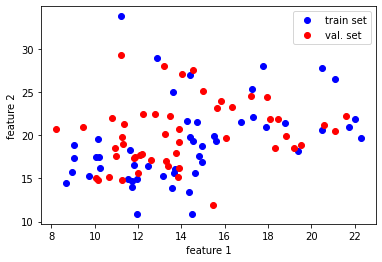

In [81]:
# 원본 훈련 세트와 검증 세트로 산점도를 그려보자

# 훈련 세트와 검증 세트 50개씩만 뽑아서 확인해 보자

plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo') # 훈련 세트는 파란색
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro') # 검증 세트는 빨간색

plt.xlabel('feature 1')
plt.ylabel('feature 2')

plt.legend(['train set', 'val. set'])
plt.show()

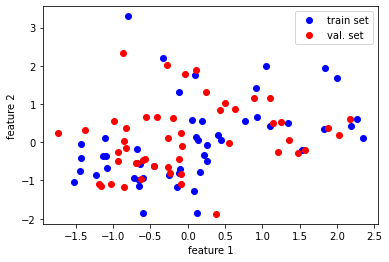

In [82]:
# 전처리한 훈련 세트와 검증 세트로 산점도를 그려보자

plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo') # 훈련 세트는 파란색
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro') # 검증 세트는 빨간색

plt.xlabel('feature 1')
plt.ylabel('feature 2')

plt.legend(['train set', 'val. set'])
plt.show()


전처리 전과 후의 산점도를 비교해 보자 <br>
미세하지만 훈련 세트와 검증 세트가 각각 다른 비율로 변환되었음을 알 수 있다.
<br><br>
무슨 의미이냐면 전처리 전 훈련 세트와 검증 세트의 점과 점 사이의 거리가 변환된 이후에 그대로 유지되지 않는다는 의미이다.
<br><br>
데이터를 제대로 전처리 하였다면 훈련 세트와 검증 세트의 거리가 그대로 유지가 되었어야 한다.
<br><br>
-> 점과 점 사이의 거리가 달라진 이유는 훈련 세트와 검증 세트를 각각 달느 비율로 전처리 했다는 의미이다.

### 올바르게 검증 세트를 전처리 해보자
검증 세트의 스케일이 훈련 세트의 스케일과 다른 비율로 조정 되면 모델에 적용된 알고리즘들이 검증 세트의 샘플 데이터를 잘못 인식한다. <br>
따라서 검증 세트를 훈련 세트와 같은 비율로 전처리 해야 한다.
<br><br>

이 방법 대로 테스트 세트와 모델을 실전에 투입하여 새로운 샘플을 처리할 때도 마찬가지이다. <br>
하지만 문제점이 하나 있다. <br>
실전에는 샘플 하나에 대한 예측값을 만들기 때문에 전처리를 위해 평균이나 표준 편차를 계산할 수도 없다.
<br><br>
그럼 어떻게 해결해야 할까 ?
<br><br>

훈련 세트의 평균, 표준 편차를 사용하여 검증 세트를 반환하면 된다.


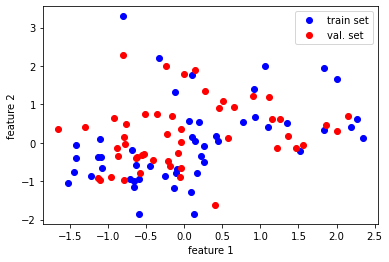

In [83]:
x_val_scaled = (x_val - train_mean) / train_std # 검증 세트를 표준화 하는데 훈련 세트의 평균과 표준편차를 이용

plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo') # 훈련 세트는 파란색
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro') # 검증 세트는 빨간색

plt.xlabel('feature 1')
plt.ylabel('feature 2')

plt.legend(['train set', 'val. set'])
plt.show()

# 이제는 전처리 전 데이터의 산점도와 전처리 후 (스케일 조정 이후) 산점도가 같아졌다.
# 즉 검증 세트와 훈련 세트가 동일한 비율로 변환되었음을 알 수 있다.

In [84]:
# 모델을 평가해 보자

layer2.score(x_val_scaled, y_val)

# 머야 검증 세트를 전처리하기 전이나 후나 정확도가 똑같은데 ????
# 검증 세트 전처리 할 필요가 없다는 말???

# 아니다 우리가 사용한 예제의 데이터는 (위스콘신 유방암 데이터 세트) 데이터가 크지 않기 때문에
# 검증 세트를 전처리하기 전과 후의 성능이 동일하다

# 만약 데이터 크기가 크다면 검증 세트를 전처리하기 전과 후의 성능이 크게 차이가 날 수 있다.

0.967032967032967

자 지금까지 검증 세트를 나누는 이유, 그리고 데이터 전처리에 대한 훈련 노하우를 알아 보았다..
이 다음에는 훈련 세트, 검증 세트와 깊은 연관이 있으면서도 머신러닝, 딥러닝에서 매우 중요한 개념인 과소적합, 과대적합에 대해 알아보려고 한다. <br>
<br>

### Reference <br>
박해선, 딥러닝 입문, 이지스퍼블리싱, 2019, 116 ~ 130pg